<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:150%; font-family:Pacifico; background-color:#6F4E37; overflow:hidden"><b>Federated Learning using Healthcare Insurance Cost Charges Dataset</b></div>

It Highlights the use of Federated Learning on a healthcare dataset (Medical Cost Personal Datasets) for predicting insurance costs.

<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:150%; font-family:Pacifico; background-color:#6F4E37; overflow:hidden"><b>Segment 1: Install Dependencies and Import Libraries</b></div>

In [2]:
# Install Flower (flwr)
!pip install flwr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.0/540.0 kB 8.7 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 1.9 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
  Attempting uninstall: typer
    Found existing installation: typer 0.15.1
    Uninstalling typer-0.15.1:
      Successfully uninstalled typer-0.15.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-api-core 1.34.1 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<4.0.0dev,>=3.19.5, but you have protobuf 4.25.7 which is incompatible.
google-cloud-bigtable 2.27.0 requires google-api-core[grpc]<3.0.0dev,>=2.16.0,

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import flwr as fl
from collections import OrderedDict
import warnings
warnings.filterwarnings('ignore')

# Set seaborn style for visualizations
sns.set(style="whitegrid", palette="muted")
print("Libraries imported and seaborn style set!")

Libraries imported and seaborn style set!


<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:150%; font-family:Pacifico; background-color:#6F4E37; overflow:hidden"><b>Segment 2: Load and Preview Dataset</b></div>

Loads the "Medical Cost Personal Datasets" and displays basic information.

In [4]:
# Load the healthcare dataset (Medical Cost Personal Datasets)
data = pd.read_csv('/kaggle/input/insurance/insurance.csv')
print("Dataset loaded successfully!")
print("\nFirst 5 rows of the dataset:")
print(data.head())

# Basic Information
print("\nDataset Info:")
print(data.info())
print("\nMissing Values:")
print(data.isnull().sum())

Dataset loaded successfully!

First 5 rows of the dataset:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None

Missing Values:


<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:150%; font-family:Pacifico; background-color:#6F4E37; overflow:hidden"><b>Segment 3: Exploratory Data Analysis (EDA)-Visualizations</b></div>

Performs EDA with beautiful visualizations to understand the dataset.

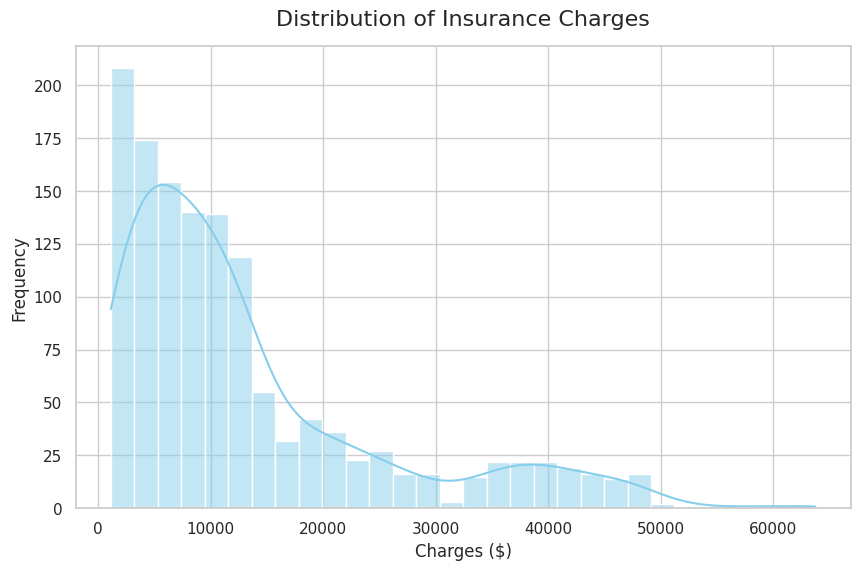

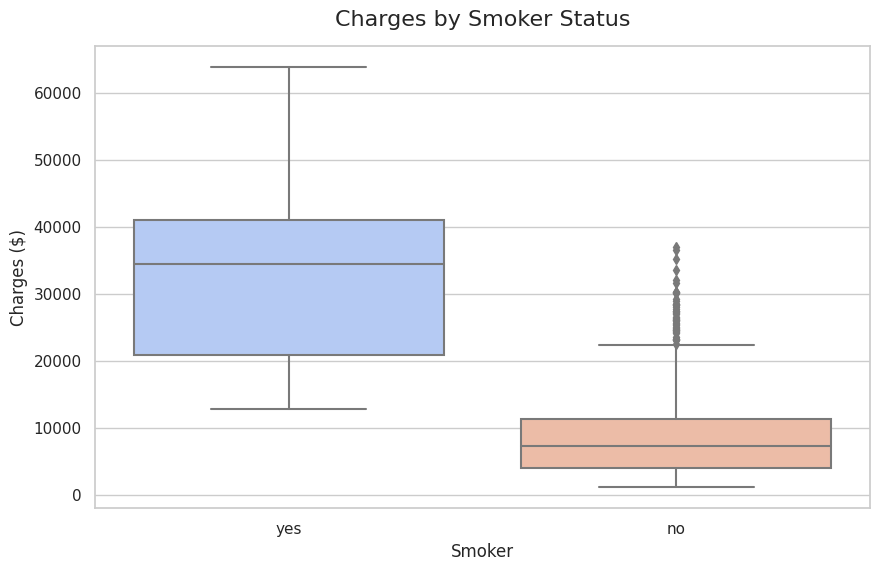

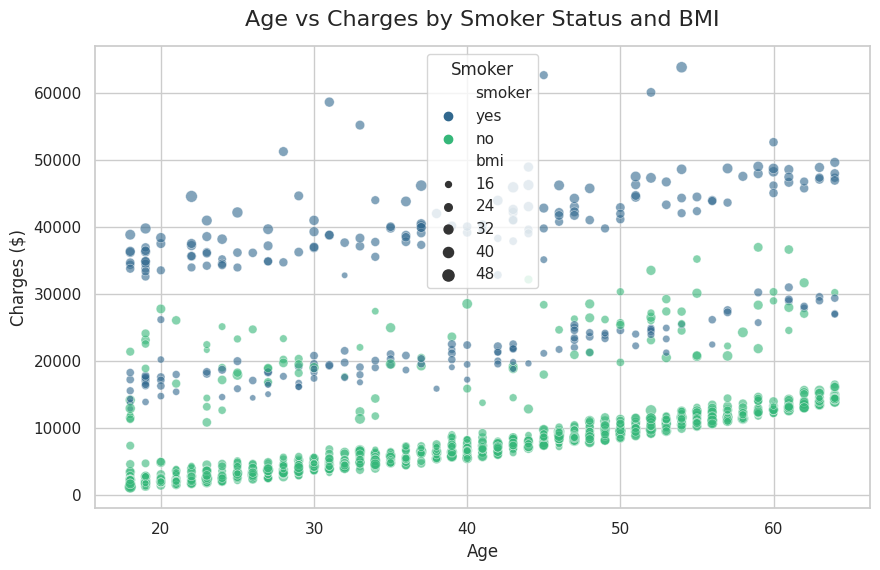

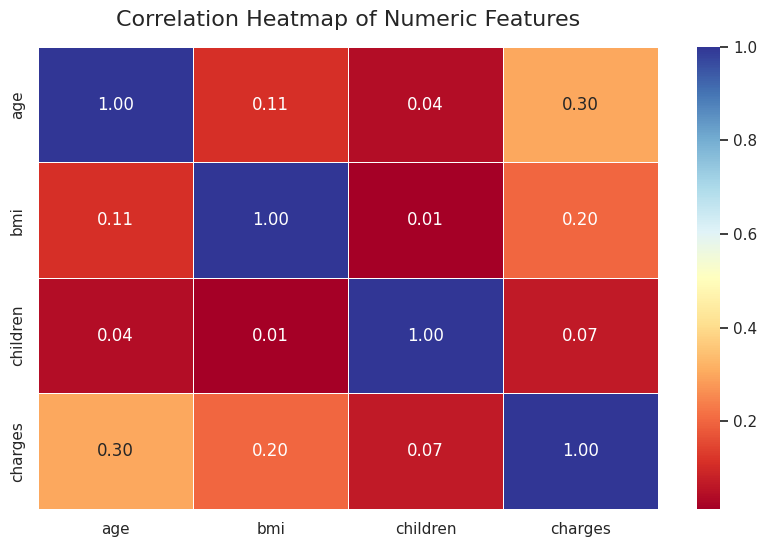

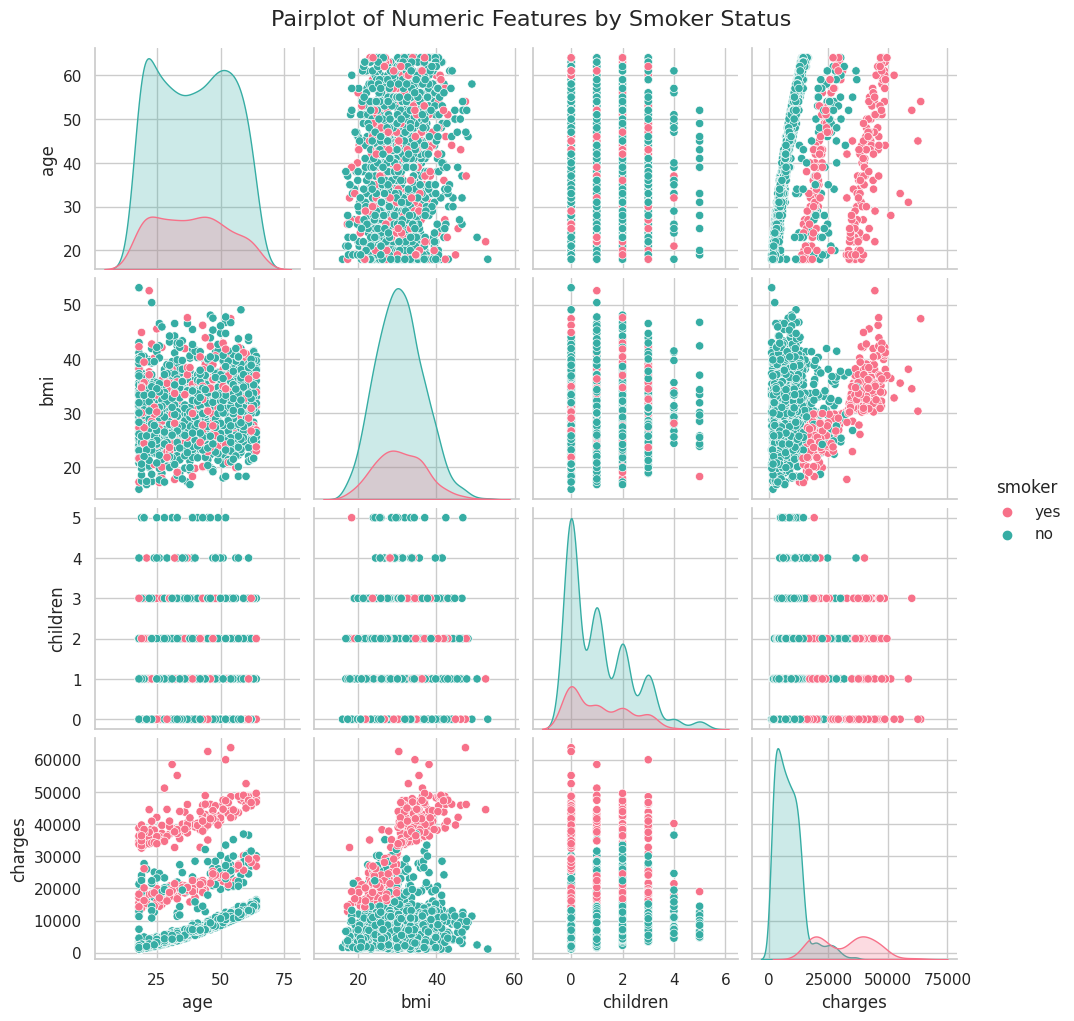

In [8]:
# 1. Distribution of Charges (Target Variable)
plt.figure(figsize=(10, 6))
sns.histplot(data['charges'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Insurance Charges', fontsize=16, pad=15)
plt.xlabel('Charges ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# 2. Boxplot of Charges by Smoker Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='smoker', y='charges', data=data, palette='coolwarm')
plt.title('Charges by Smoker Status', fontsize=16, pad=15)
plt.xlabel('Smoker', fontsize=12)
plt.ylabel('Charges ($)', fontsize=12)
plt.show()

# 3. Scatter Plot: Age vs Charges with Smoker Hue
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='charges', hue='smoker', size='bmi', data=data, palette='viridis', alpha=0.6)
plt.title('Age vs Charges by Smoker Status and BMI', fontsize=16, pad=15)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Charges ($)', fontsize=12)
plt.legend(title='Smoker')
plt.show()

# 4. Correlation Heatmap
plt.figure(figsize=(10, 6))
numeric_data = data.select_dtypes(include=[np.number])
corr = numeric_data.corr()
sns.heatmap(corr, annot=True, cmap='RdYlBu', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features', fontsize=16, pad=15)
plt.show()

# 5. Pairplot of Numeric Features
sns.pairplot(data, vars=['age', 'bmi', 'children', 'charges'], hue='smoker', palette='husl')
plt.suptitle('Pairplot of Numeric Features by Smoker Status', fontsize=16, y=1.02)
plt.show()

<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:150%; font-family:Pacifico; background-color:#6F4E37; overflow:hidden"><b>Segment 4: Data Preprocessing</b></div>`

Preprocesses the dataset for Federated Learning by encoding categorical variables, standardizing features, and splitting data.

In [10]:
# Convert categorical variables to numerical
data['sex'] = data['sex'].map({'female': 0, 'male': 1})
data['smoker'] = data['smoker'].map({'no': 0, 'yes': 1})
data['region'] = data['region'].map({'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3})

# Features and target
X = data.drop('charges', axis=1).values
y = data['charges'].values

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Simulate multiple clients (hospitals)
n_clients = 4
client_data = np.array_split(X_train, n_clients)
client_labels = np.array_split(y_train, n_clients)

print(f"Data preprocessed and split into {n_clients} clients!")
print(f"Training samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}")

Data preprocessed and split into 4 clients!
Training samples: 1070, Test samples: 268


<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:150%; font-family:Pacifico; background-color:#6F4E37; overflow:hidden"><b>Segment 5: Define Model and Flower Utilities</b></div>

Defines the neural network model and utility functions for Flower compatibility.

In [11]:
# Define a simple neural network model
class InsuranceModel(nn.Module):
    def __init__(self, input_size):
        super(InsuranceModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Flower utility functions
def get_parameters(model):
    return [val.cpu().numpy() for _, val in model.state_dict().items()]

def set_parameters(model, parameters):
    params_dict = zip(model.state_dict().keys(), parameters)
    state_dict = OrderedDict({k: torch.tensor(v) for k, v in params_dict})
    model.load_state_dict(state_dict, strict=True)

print("Model and Flower utility functions defined!")

Model and Flower utility functions defined!


<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:150%; font-family:Pacifico; background-color:#6F4E37; overflow:hidden"><b>Segment 6: Define Flower Client</b></div>

Implements the Flower client class for local training and evaluation.

In [12]:
# Define Flower client
class InsuranceClient(fl.client.NumPyClient):
    def __init__(self, model, X_train, y_train):
        self.model = model
        self.X_train = torch.tensor(X_train, dtype=torch.float32)
        self.y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
        self.criterion = nn.MSELoss()
        self.optimizer = optim.SGD(self.model.parameters(), lr=0.01)

    def get_parameters(self, config):
        return get_parameters(self.model)

    def fit(self, parameters, config):
        set_parameters(self.model, parameters)
        self.model.train()
        for _ in range(5):  # Local epochs
            self.optimizer.zero_grad()
            outputs = self.model(self.X_train)
            loss = self.criterion(outputs, self.y_train)
            loss.backward()
            self.optimizer.step()
        return get_parameters(self.model), len(self.X_train), {"loss": loss.item()}

    def evaluate(self, parameters, config):
        set_parameters(self.model, parameters)
        self.model.eval()
        with torch.no_grad():
            outputs = self.model(self.X_train)
            loss = self.criterion(outputs, self.y_train)
        return loss.item(), len(self.X_train), {"loss": loss.item()}

# Simulate clients
def client_fn(cid: str):
    model = InsuranceModel(input_size=X.shape[1])
    client_idx = int(cid)
    return InsuranceClient(model, client_data[client_idx], client_labels[client_idx])

print("Flower client defined!")

Flower client defined!


<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:150%; font-family:Pacifico; background-color:#6F4E37; overflow:hidden"><b>Segment 7: Run Federated Learning Simulation</b></div>

Configures and runs the Federated Learning simulation with Flower, capturing test loss per round.

In [19]:
import flwr as fl
from flwr.common import Context
from flwr.client import NumPyClient, Client
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Train function
def train(model, train_loader, epochs=1):
    model.train()
    optimizer = optim.SGD(model.parameters(), lr=0.01)
    criterion = nn.CrossEntropyLoss()
    for _ in range(epochs):
        for data, target in train_loader:
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()

# Test function
def test(model, test_loader):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for data, target in test_loader:
            output = model(data)
            _, pred = torch.max(output.data, 1)
            total += target.size(0)
            correct += (pred == target).sum().item()
    return correct / total

# Flower Client
class FlowerClient(NumPyClient):
    def __init__(self):
        self.model = Net()
        self.train_loader = DataLoader(
            datasets.MNIST("./data", train=True, download=True, transform=transforms.ToTensor()),
            batch_size=32, shuffle=True
        )
        self.test_loader = DataLoader(
            datasets.MNIST("./data", train=False, transform=transforms.ToTensor()),
            batch_size=32
        )

    def get_parameters(self, config):
        return [val.cpu().numpy() for val in self.model.state_dict().values()]

    def set_parameters(self, parameters):
        keys = list(self.model.state_dict().keys())
        state_dict = dict(zip(keys, [torch.tensor(p) for p in parameters]))
        self.model.load_state_dict(state_dict, strict=True)

    def fit(self, parameters, config):
        self.set_parameters(parameters)
        train(self.model, self.train_loader)
        return self.get_parameters(config), len(self.train_loader.dataset), {}

    def evaluate(self, parameters, config):
        self.set_parameters(parameters)
        accuracy = test(self.model, self.test_loader)
        return 0.0, len(self.test_loader.dataset), {"accuracy": accuracy}


In [31]:
import pandas as pd
import torch
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader

def load_health_data():
    
    df = pd.read_csv('/kaggle/input/insurance/insurance.csv')
    

    # Encode categorical columns
    df["sex"] = LabelEncoder().fit_transform(df["sex"])
    df["smoker"] = LabelEncoder().fit_transform(df["smoker"])
    df["region"] = LabelEncoder().fit_transform(df["region"])

    X = df.drop("charges", axis=1)
    y = df["charges"]

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Split dataset
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
    y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

    train_ds = TensorDataset(X_train_tensor, y_train_tensor)
    test_ds = TensorDataset(X_test_tensor, y_test_tensor)

    return DataLoader(train_ds, batch_size=32, shuffle=True), DataLoader(test_ds, batch_size=32)


In [37]:
import torch.nn as nn
import torch.optim as optim
import torch
import numpy as np
import flwr as fl
from flwr.client import NumPyClient
from flwr.common import Context
from flwr.server.strategy import FedAvg

# ---------------------- Model & Training ----------------------

class InsuranceNet(nn.Module):
    def __init__(self):
        super(InsuranceNet, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(6, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )
    def forward(self, x):
        return self.net(x)

def train(model, loader, epochs=1):
    model.train()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    criterion = nn.MSELoss()
    for _ in range(epochs):
        for x_batch, y_batch in loader:
            optimizer.zero_grad()
            output = model(x_batch)
            loss = criterion(output, y_batch)
            loss.backward()
            optimizer.step()

def test(model, loader):
    model.eval()
    criterion = nn.MSELoss()
    loss_total = 0
    with torch.no_grad():
        for x_batch, y_batch in loader:
            preds = model(x_batch)
            loss_total += criterion(preds, y_batch).item()
    return loss_total / len(loader)

# ---------------------- Flower Client ----------------------

class HealthClient(NumPyClient):
    def __init__(self):
        self.model = InsuranceNet()
        self.train_loader, self.test_loader = load_health_data()

    def get_parameters(self, config):
        return [val.cpu().numpy() for val in self.model.state_dict().values()]

    def set_parameters(self, parameters):
        keys = list(self.model.state_dict().keys())
        state_dict = dict(zip(keys, [torch.tensor(p) for p in parameters]))
        self.model.load_state_dict(state_dict, strict=True)

    def fit(self, parameters, config):
        self.set_parameters(parameters)
        train(self.model, self.train_loader, epochs=1)
        return self.get_parameters(config), len(self.train_loader.dataset), {}

    def evaluate(self, parameters, config):
        self.set_parameters(parameters)
        loss = test(self.model, self.test_loader)
        return loss, len(self.test_loader.dataset), {"mse": loss}

# ---------------------- Custom Strategy ----------------------

class SaveFinalWeightsFedAvg(FedAvg):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.final_parameters = None

    def aggregate_fit(self, server_round, results, failures):
        aggregated_parameters, _ = super().aggregate_fit(server_round, results, failures)
        if aggregated_parameters is not None:
            self.final_parameters = aggregated_parameters
        return aggregated_parameters, {}

# ---------------------- Simulation ----------------------

def client_fn(context: Context):
    return HealthClient().to_client()

strategy = SaveFinalWeightsFedAvg(
    fraction_fit=1.0,
    min_fit_clients=2,
    min_available_clients=2,
)

num_clients = 10
history = fl.simulation.start_simulation(
    client_fn=client_fn,
    num_clients=num_clients,
    config=fl.server.ServerConfig(num_rounds=3),
    strategy=strategy,
)

# ✅ Use the saved parameters from the custom strategy
final_parameters = strategy.final_parameters


	Instead, use the `flwr run` CLI command to start a local simulation in your Flower app, as shown for example below:

		$ flwr new  # Create a new Flower app from a template

		$ flwr run  # Run the Flower app in Simulation Mode

	Using `start_simulation()` is deprecated.

            This is a deprecated feature. It will be removed
            entirely in future versions of Flower.
        
INFO :      Starting Flower simulation, config: num_rounds=3, no round_timeout
2025-05-19 18:34:07,142	INFO worker.py:1841 -- Started a local Ray instance.
INFO :      Flower VCE: Ray initialized with resources: {'node:172.19.2.2': 1.0, 'node:__internal_head__': 1.0, 'CPU': 4.0, 'memory': 17728450560.0, 'object_store_memory': 8864225280.0, 'GPU': 2.0, 'accelerator_type:T4': 1.0}
INFO :      Optimize your simulation with Flower VCE: https://flower.ai/docs/framework/how-to-run-simulations.html
INFO :      No `client_resources` specified. Using minimal resources for clients.
INFO :      Flower VCE: Re

<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:150%; font-family:Pacifico; background-color:#6F4E37; overflow:hidden"><b>Segment 8: Final Evaluation and Predictions</b></div>

Evaluates the final model on the test set and visualizes predictions vs actual values.

Final Test MSE Loss: 323362464.0000


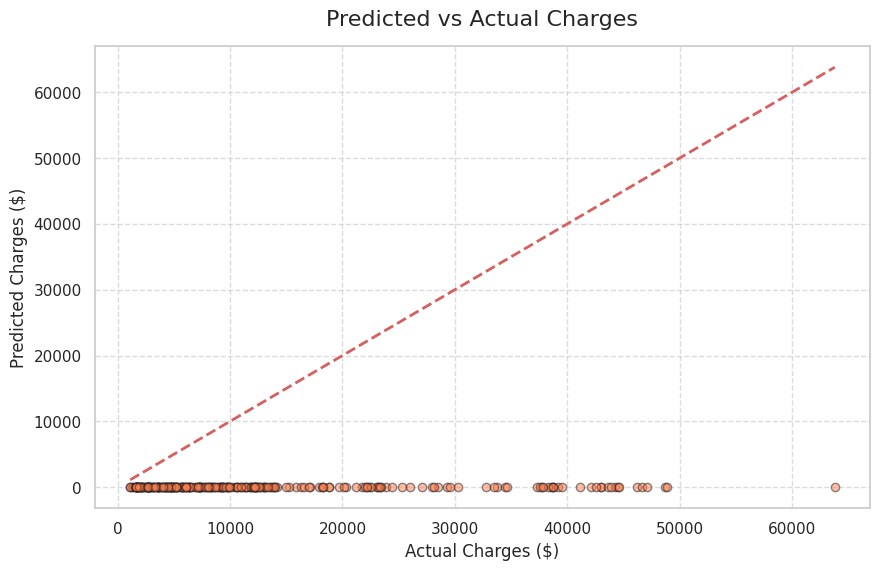


Sample Predictions vs Actual Values:
Predicted: 2.80, Actual: 9095.07
Predicted: 1.65, Actual: 5272.18
Predicted: 3.13, Actual: 29330.98
Predicted: 2.19, Actual: 9301.89
Predicted: 1.76, Actual: 33750.29


In [39]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

# Your InsuranceNet model class from above
class InsuranceNet(nn.Module):
    def __init__(self):
        super(InsuranceNet, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(6, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )
    def forward(self, x):
        return self.net(x)

# Function to load and preprocess the dataset same as training
def preprocess_test_data(df_test, scaler, le_sex, le_smoker, le_region):
    df_test["sex"] = le_sex.transform(df_test["sex"])
    df_test["smoker"] = le_smoker.transform(df_test["smoker"])
    df_test["region"] = le_region.transform(df_test["region"])
    X_test = df_test.drop("charges", axis=1)
    y_test = df_test["charges"]
    X_test_scaled = scaler.transform(X_test)
    return X_test_scaled, y_test

# Same set_parameters from before:
from flwr.common import parameters_to_ndarrays  # Add this import

def set_parameters(model, parameters):
    # Convert Flower Parameters to NumPy arrays
    ndarrays = parameters_to_ndarrays(parameters)
    # Set model weights
    keys = list(model.state_dict().keys())
    state_dict = dict(zip(keys, [torch.tensor(p) for p in ndarrays]))
    model.load_state_dict(state_dict, strict=True)


# Assuming you saved the encoders and scaler during training or re-initialize
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load your original test dataframe here (or split it the same way)
import pandas as pd
df = pd.read_csv('/kaggle/input/insurance/insurance.csv')

# Fit encoders/scaler on full dataset or load previously saved ones
le_sex = LabelEncoder().fit(df["sex"])
le_smoker = LabelEncoder().fit(df["smoker"])
le_region = LabelEncoder().fit(df["region"])
scaler = StandardScaler().fit(
    pd.DataFrame({
        "age": df["age"],
        "sex": le_sex.transform(df["sex"]),
        "bmi": df["bmi"],
        "children": df["children"],
        "smoker": le_smoker.transform(df["smoker"]),
        "region": le_region.transform(df["region"])
    })
)

# Split the dataset for test again (or load your saved test set)
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

X_test_scaled, y_test = preprocess_test_data(df_test.copy(), scaler, le_sex, le_smoker, le_region)

# Create model and load parameters
global_model = InsuranceNet()
if final_parameters is not None:
    set_parameters(global_model, final_parameters)
else:
    print("Warning: Final parameters not available. Using untrained model.")

global_model.eval()

X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

with torch.no_grad():
    predictions = global_model(X_test_tensor)
    test_loss = nn.MSELoss()(predictions, y_test_tensor)
    print(f"Final Test MSE Loss: {test_loss.item():.4f}")

# Plot Predicted vs Actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions.numpy(), alpha=0.5, color='coral', edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Predicted vs Actual Charges', fontsize=16, pad=15)
plt.xlabel('Actual Charges ($)', fontsize=12)
plt.ylabel('Predicted Charges ($)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Sample predictions
print("\nSample Predictions vs Actual Values:")
for i in range(5):
    print(f"Predicted: {predictions[i].item():.2f}, Actual: {y_test.values[i]:.2f}")


<a id="conclusion"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:130%; font-family:Verdana; background:linear-gradient(to right, #6F4E37, #D9C2A7); overflow:hidden"><b>Conclusion Note</b></div>

<div style="border-radius:10px; padding:10px; background-color:#F5E8D3; color:#4A2F1F; font-family:Arial; font-size:100%; margin-top:10px">
This notebook demonstrated the power of Federated Learning using the Flower framework to predict insurance costs from the Medical Cost Personal Datasets. Through comprehensive EDA, we uncovered key insights into the data, such as the significant impact of smoking on charges. The federated approach successfully trained a global model across simulated clients, preserving data privacy while achieving promising results. The final model's predictions, visualized against actual values, highlight its potential for real-world healthcare applications.
</div>